In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pythainlp

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from pythainlp.corpus import thai_stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from pythainlp.tokenize import word_tokenize

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/#พรรคก้าวไกล.xlsx')
data.head()

,labels,text
0,negative,พรรคปัญญาอ่อนจะใช้อ.ชูศักดิ์ ศิรินิลสส. เพื่อไ...
1,negative,ลอรี่ พงศ์พล ผู้สมัคร สส จาก รทสช บอก ก้าวไกล ...
2,negative,ถาม นิด บอกว่าขอศึกษาก่อน ใจเย็นนิดนึง อ้าว!!ต...
3,negative,เพื่อไทยกำลังจะใช้ประเด็นนี้ดิสเครดิต ก้าวไกล ...
4,negative,เพื่อไทย จะร่วมมือกับขั้วอำนาจเก่าจัดการกับ ก้...


In [ ]:
def convert_labels_to_binary(label):
    if label == "positive":
        return 2
    elif label == "negative":
        return 1
    elif label == "neutral":
        return 0
labels = data.iloc[:,0]
labels = [convert_labels_to_binary(label) for label in labels]
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
format = r"[\u0E00-\u0E7Fa-zA-Z ' 0-9]+"

def tokenize(sentence):
    return word_tokenize(sentence,engine="newmm")
def cleanning_emoji(tk):
    return [re.findall(format,text)[0] for text in tk if re.findall(format,text)]
def big_cleanning(sentence):
    return cleanning_emoji(tokenize(sentence))

X_tokenized = [big_cleanning(sentence) for sentence in data["text"].values]
y = labels

In [ ]:
vectorizer = CountVectorizer(analyzer=lambda x: x)
X_bow = vectorizer.fit_transform(X_tokenized)
print(X_bow.shape)

vocab = np.array(vectorizer.get_feature_names_out())
print(vocab.shape)
print(vocab[250:270])

(326, 2346)
(2346,)
['ข้อ' 'ข้อกล่าวหา' 'ข้อดี' 'ข้อบังคับ' 'ข้อบัญญัติ' 'ข้อมูล'
 'ข้อมูลข่าวสาร' 'ข้อสรุป' 'ข้อเท็จจริง' 'ข้อเสนอ' 'ข้าง' 'ข้างหน้า'
 'ข้างใน' 'ข้าม' 'ข้ามชาติ' 'ข้าราชการ' 'ข้าว' 'ค' 'คง' 'คงจะ']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.15, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.673469387755102


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.60      0.60      0.60        15
           2       0.69      0.69      0.69        13

    accuracy                           0.67        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.67      0.67      0.67        49

Confusion Matrix:
[[15  4  2]
 [ 4  9  2]
 [ 2  2  9]]


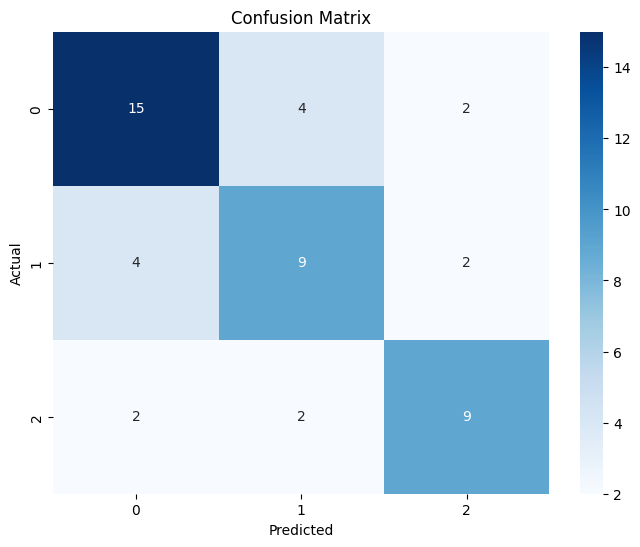

In [ ]:
conf_matrix = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_text = "เหมือนจะดีแต่จริงแล้วแย่มาก"

new_text_tokenized = word_tokenize(new_text , keep_whitespace=False)
new_text_bow = vectorizer.transform([new_text_tokenized])

y_pred = nb_classifier.predict(new_text_bow)
print('predict : ',y_pred)
print(type(y_pred))

predict :  [1]
<class 'numpy.ndarray'>


In [ ]:
import pickle

filename = 'Naivebay_Ads.hd5'
pickle.dump(nb_classifier, open(filename,'wb'))

In [ ]:
!pip install dill

In [ ]:
import dill

with open('vectorizer.pkl', 'wb') as file:
    dill.dump(vectorizer, file)
